Имеется набор данных

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`City`|город|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`CreditCard`|есть ли кредитная карта|
|`Loyalty`|активный клиент|
|`estimated_salary`|заработная плата клиента|
|`Churn`|ушел или нет|

Задание: для количественных признаков `score`, `Balance` и `estimated_salary` проверить гипотезы о наличие различий в значениях этих признаков в разрезе целевого признака.

Предварительно рассчитать оценки выборочных средних и медиан, построить гистограммы и функции плотности.

ПРЕДВАРИТЕЛЬНУЮ ПОДГОТОВКУ данных можно опустить.  

In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal)

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_csv('/content/drive/MyDrive/Аналитик Данных/Гипотезы /bank_dataset.csv')

In [41]:
print(df.shape)
print(df.dtypes)
df.head()

(10000, 12)
userid                int64
score                 int64
City                 object
Gender               object
Age                   int64
Objects               int64
Balance             float64
Products              int64
CreditCard            int64
Loyalty               int64
estimated_salary    float64
Churn                 int64
dtype: object


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [42]:
# приводим к нижнему регистру
df.columns = df.columns.str.lower()

Рассчитаем оценки выборочных средних и медиан для каждого признака в разрезе целевого признака Churn

In [43]:
cols = ['score', 'balance', 'estimated_salary']

In [44]:
grouped = df.groupby('churn')

for col in ['score', 'balance', 'estimated_salary']:
    mean_churn = grouped[col].mean()
    median_churn = grouped[col].median()
    print(f'For {col}:')
    print('Среднее:', mean_churn)
    print('Медиана:', median_churn)

For score:
Среднее: churn
0    651.853196
1    645.351497
Name: score, dtype: float64
Медиана: churn
0    653.0
1    646.0
Name: score, dtype: float64
For balance:
Среднее: churn
0    119535.864270
1    120746.971132
Name: balance, dtype: float64
Медиана: churn
0    119791.215
1    119948.090
Name: balance, dtype: float64
For estimated_salary:
Среднее: churn
0     99738.391772
1    101465.677531
Name: estimated_salary, dtype: float64
Медиана: churn
0     99645.04
1    102460.84
Name: estimated_salary, dtype: float64


In [45]:
# мода
for i in cols:
    mode_0 = df[df.churn==0][i].mode().to_list()
    mode_1 = df[df.churn==1][i].mode().to_list()
print(mode_0)
print(mode_1)

[24924.92]
[11.58, 91.75, 123.07, 236.45, 417.41, 468.94, 548.52, 582.59, 645.61, 667.66, 738.88, 944.41, 980.93, 1112.76, 1140.02, 1262.83, 1285.81, 1643.11, 1713.1, 2019.78, 2079.2, 2319.96, 2423.9, 2605.65, 2619.64, 2705.31, 2919.21, 2920.63, 3268.17, 3440.47, 3472.63, 3497.43, 3749.0, 3966.5, 4033.39, 4121.04, 4176.17, 4523.74, 4859.59, 4861.72, 4896.11, 4969.13, 5008.23, 5036.39, 5075.17, 5097.67, 5104.08, 5159.21, 5408.74, 5459.07, 5472.7, 5549.11, 5557.88, 5558.47, 5669.31, 5684.17, 5790.9, 5811.9, 5831.0, 5862.53, 5893.23, 5924.38, 6009.27, 6129.61, 6209.51, 6342.84, 6554.97, 6589.16, 6865.41, 6981.43, 6985.34, 7312.25, 7387.8, 7571.51, 7597.83, 7611.61, 7861.68, 7905.06, 7926.35, 7953.62, 8059.44, 8080.85, 8128.32, 8546.87, 8590.83, 8636.05, 8651.92, 8755.69, 8973.67, 9149.96, 9217.55, 9221.78, 9241.83, 9308.1, 9324.31, 9439.31, 9445.42, 9452.88, 9497.99, 9712.52, 9854.72, 10014.72, 10034.77, 10070.4, 10072.55, 10137.34, 10703.53, 10899.63, 11199.04, 11302.7, 11384.45, 11710.4

гистограммы и функции плотности для каждого признака в разрезе целевого признака Churn

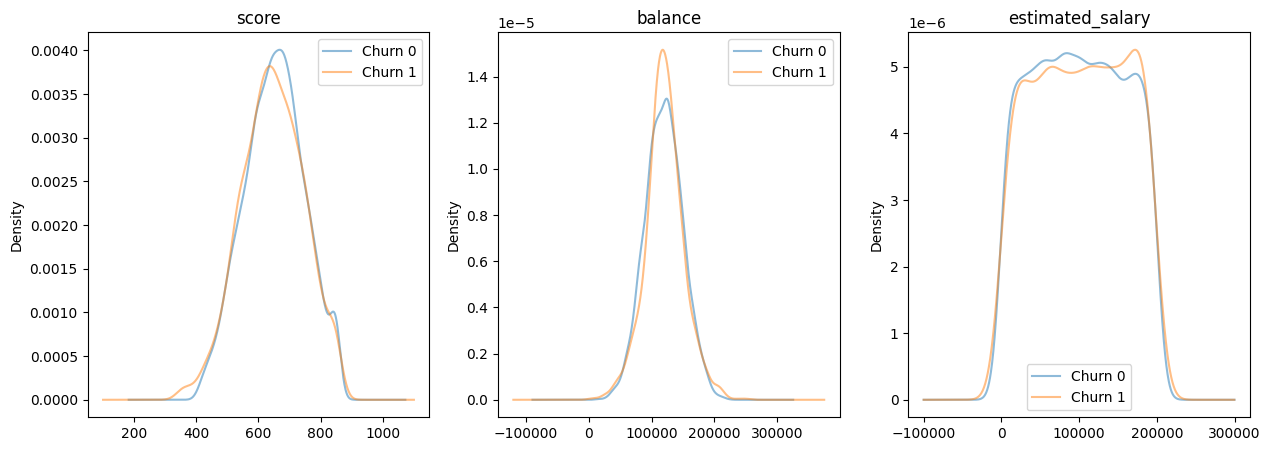

In [47]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(['score', 'balance', 'estimated_salary'], 1):
    plt.subplot(1, 3, i)
    for churn, data in df.groupby('churn'):
        data[col].plot(kind='kde', label=f'Churn {churn}', alpha=0.5)
    plt.title(col)
    plt.legend()

plt.show()

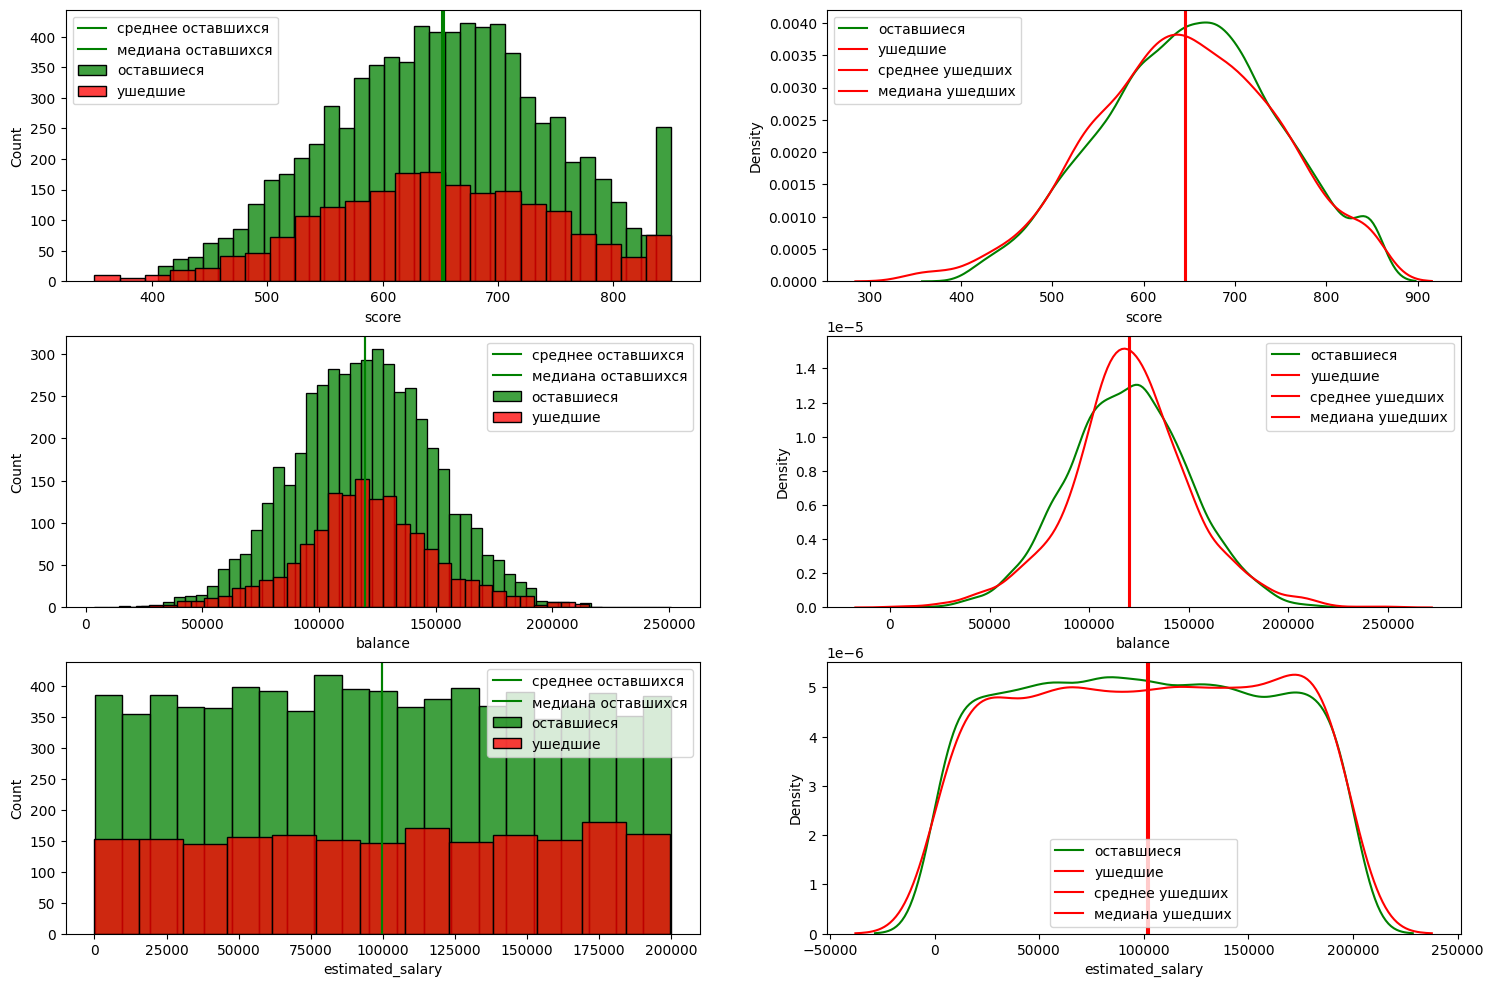

In [48]:
fig, ax = plt.subplots(3, 2, figsize = (18,12))

for i, y in enumerate(cols):
    plt.subplot(3, 2, 2*i+1)
    mean_0 = df[df.churn==0][y].mean()
    median_0 = df[df.churn==0][y].median()
    ax = sns.histplot(data=df[df.churn==0],
                      x = y,
                      color='green',
                      label='оставшиеся')
    ax = sns.histplot(data=df[df.churn==1],
                      x = y,
                      color='red',
                      label='ушедшие')
    ax.axvline(mean_0, color='green', label='среднее оставшихся')
    ax.axvline(median_0, color='green', label='медиана оставшихся')
    plt.legend()



    plt.subplot(3, 2, 2*i+2)
    mean_1 = df[df.churn==1][y].mean()
    median_1 = df[df.churn==1][y].median()

    ax = sns.kdeplot(data=df[df.churn==0],
                      x = y,
                      color='green',
                      label='оставшиеся')
    ax = sns.kdeplot(data=df[df.churn==1],
                      x = y,
                      color='red',
                      label='ушедшие')

    ax.axvline(mean_1, color='red', label='среднее ушедших')
    ax.axvline(median_1, color='red', label='медиана ушедших')

    plt.legend()

статистический анализ различий в значениях признаков в разрезе целевого признака с помощью t-теста


Гипотезы:

Уровень значимости: alpha = 0.05

H0 - разница в значения баллов кредитного скоринга для оставшихся и ушедших клиентов отсутствует (x==y)

H1 - разница в значения баллов кредитного скоринга для оставшихся и ушедших клиентов статистически значима (x!=y)

In [49]:
# нормальность распределения критерий Колмогорова-Смирннова
x = df[df.churn==0].balance
y = df[df.churn==1].score

print(
    kstest(x, 'norm',
       args=(x.mean(), x.std()), nan_policy='omit' )
    )

print(
    kstest(y, 'norm',
       args=(y.mean(), y.std()), nan_policy='omit' )
    )

y = df[df.churn==1].balance

print(
    kstest(y, 'norm',
       args=(y.mean(), y.std()), nan_policy='omit' )
    )

KstestResult(statistic=0.007475743969352133, pvalue=0.9474815181540325, statistic_location=121151.05, statistic_sign=-1)
KstestResult(statistic=0.02067881802276783, pvalue=0.3437391055014972, statistic_location=850, statistic_sign=1)
KstestResult(statistic=0.041133848085517344, pvalue=0.010708894370023366, statistic_location=102870.93, statistic_sign=-1)


 Для х - нормальное распределение при p_value = 0.01

Для у - гипотез H0 отклоняем при p_value = 0.94

In [ ]:
# Проверка гипотез

In [50]:
kruskal(x, y, nan_policy='omit')

KruskalResult(statistic=1.4945887390420718, pvalue=0.22150585375885248)

На основании p_value = 0.22  отвергает гипотезу H1 и принимаем гипотезу H0 т.е. Параметры совпадают

In [51]:
mannwhitneyu(x, y, nan_policy='omit')

MannwhitneyuResult(statistic=3647194.5, pvalue=0.22150885555919375)

In [52]:
mannwhitneyu(x, y, alternative='less', nan_policy='omit')

MannwhitneyuResult(statistic=3647194.5, pvalue=0.11075442777959688)

In [53]:
for col in ['score', 'balance', 'estimated_salary']:
    churn_0 = df[df['churn'] == 0][col]
    churn_1 = df[df['churn'] == 1][col]

    t_stat, p_value = stats.mannwhitneyu(churn_0, churn_1, nan_policy='omit')

    print(f'T-test result for {col}:')
    print('T-statistic:', t_stat)
    print('P-value:', p_value)

T-test result for score:
T-statistic: 8381083.0
P-value: 0.01986866117272834
T-test result for balance:
T-statistic: 3647194.5
P-value: 0.22150885555919375
T-test result for estimated_salary:
T-statistic: 7969863.0
P-value: 0.22705150930153783


На основании проведенного анализа с помощью теста Манна-Уитни можно сделать следующие выводы:

1. Для "score" p-value = 0.0199, что меньше статистической значимости 0.05. Мы отвергаем нулевую гипотезу H0 о том, что распределения оценок клиентов, ушедших и оставшихся, равны. Следовательно, есть статистически значимые различия между оценками клиентов в двух группах.

2. Для "balance" p-value = 0.2215, что больше уровня статистической значимости 0.05. Мы не можем отвергнуть H0 о равенстве распределений балансов клиентов в двух группах. Нет статистически значимых различий в балансах между ушедшими и оставшимися клиентами.

3. Для "estimated_salary" p-value = 0.2271, что больше уровня статистической значимости 0.05. Мы не можем отвергнуть нулевую гипотезу о равенстве распределений оценок заработной платы клиентов в двух группах. Нет статистически значимых различий в заработной плате между ушедшими и оставшимися клиентами.

На основании проведенного анализа, можно сделать вывод о наличии статистически значимых различий в оценках клиентов, но отсутствии таковых в балансах и заработной плате между ушедшими и оставшимися клиентами.